# Fitting a Multilayer Perceptron on Sine Wave

In [1]:
import numpy as np # scientific computing
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x = np.arange(-50, 50, 0.1) # input variable / independent variable / features /
f = np.sin(x) # f(x)
y = f + np.random.normal(0, 0.5, size=len(f)) # add Gaussian noise with mean = 0 and std = 1
list(zip(x, y))

[(-50.0, 0.8382541615140954),
 (-49.9, 0.16370445002591832),
 (-49.8, 1.1047869901987883),
 (-49.699999999999996, 0.5965233232978235),
 (-49.599999999999994, -0.1920803179726025),
 (-49.49999999999999, 0.9996374908383054),
 (-49.39999999999999, -0.003228679401263146),
 (-49.29999999999999, 0.8484502121195044),
 (-49.19999999999999, -0.3494213097614137),
 (-49.09999999999999, 1.9157010337137674),
 (-48.999999999999986, 1.5088947850064973),
 (-48.899999999999984, 2.0311050830117408),
 (-48.79999999999998, 1.058707793568188),
 (-48.69999999999998, 1.1207490089725258),
 (-48.59999999999998, 0.17682131581577243),
 (-48.49999999999998, 0.7864252219917086),
 (-48.39999999999998, 1.9877130942692989),
 (-48.299999999999976, 0.6102355307266052),
 (-48.199999999999974, 1.128440383622114),
 (-48.09999999999997, 1.9753060568508651),
 (-47.99999999999997, 0.21394074917234207),
 (-47.89999999999997, 1.297194260479481),
 (-47.79999999999997, 1.3805574925382498),
 (-47.69999999999997, 0.805170658132898

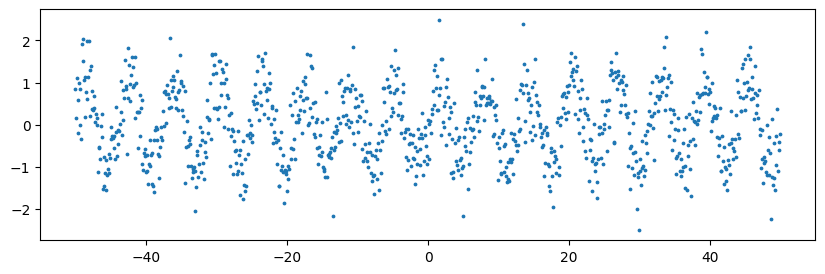

In [3]:
plt.figure(figsize=(10, 3))
plt.scatter(x, y, s=3)

In statistical learning, in this case supervised learning $X -> Y$ 
* you assume that your n datapoints: $\{x_i, y_i\}_{i=1}^{n}$
* you assume that these data came from a real world "generative process" and it follows this form: $Y = f(X) + \epsilon$ where $\epsilon$ is independent noise
* now our goal is to find a function $\hat{f} \approx f$ using dataset, where $\hat{f}$ is our model

In [4]:
# let's first define our neural network
# that takes in x and outputs y

In [5]:
# https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html
import torch # torch is like numpy but spec. for neural networks
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

/home/prince/anaconda3/envs/rl/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/prince/anaconda3/envs/rl/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Tensors in Pytorch are arrays with additional attributes:
* They track "gradients" which is convenient for the backpropagation algorithm (learning algorithm of Neural Networks)
* You can assign to CPU or GPU per tensor

In [6]:
# Get cpu, gpu or mps device for training.
device = "cuda" # we are using cuda in nVidia GPU

import torch.nn as nn
import torch.nn.functional as F

# Define model
class NeuralNetwork(nn.Module):  # nn.Module is boilerplate / template that we inherit
    def __init__(self):
        super().__init__()

        # define architecture, Sequential is the order of "layers" - sets of neurons and operations
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 256),
            nn.BatchNorm1d(256),  # Batch normalization after first linear layer
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),    # Batch normalization after second linear layer
            nn.ReLU(),            
            nn.Linear(256, 1),
            nn.BatchNorm1d(1),    # Batch normalization after second linear layer            
        )

        # Apply Kaiming He initialization
        self._initialize_weights()

    def forward(self, x):
        y_hat = self.linear_relu_stack(x)
        y_hat = nn.functional.tanh(y_hat)
        return y_hat

    def _initialize_weights(self):
        for layer in self.modules():
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')  # Kaiming He initialization for ReLU layers
                if layer.bias is not None:
                    nn.init.constant_(layer.bias, 0)  # Initialize bias to zero

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=1, bias=True)
    (7): BatchNorm1d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
)


In [7]:
x = np.float32(x)
y = np.float32(y)

In [8]:
x.shape, y.shape

((1000,), (1000,))

In [9]:
# Pytorch expects the shape/dimensions to be N x F
# N - number of data / batch of data fed
# F - feature size

# For images, Pytorch expects N x C x H x W
# N - number of data / batch of data fed
# C - channels, e.g. RGB = 3
# H - height
# W - width

# Make sure the datapoints follow these conventions!

In [10]:
x_tensor = torch.tensor(np.float32(x)).to(device) # transfoer to GPU (device)
x_tensor = x_tensor.unsqueeze(1) # method to add an extra dimension to dimension 1

y_tensor = torch.tensor(np.float32(y)).to(device)
y_tensor = y_tensor.unsqueeze(1)

print(device)
print(x.shape, y.shape)
print(x_tensor.shape, y_tensor.shape)

cuda
(1000,) (1000,)
torch.Size([1000, 1]) torch.Size([1000, 1])


In [11]:
# built-in __call__ method
class TestFunc:
    def __init__(self):
        return None
    def __call__(self, x):
        return 2 * x

tf = TestFunc()
tf(3)

6

In [12]:
# don't use this ever
model.forward(x_tensor[0:5])

# use this (__call__) which has built-in helper functions in Pytorch
model(x_tensor[0:5]) # outputs y_hat

tensor([[ 0.9330],
        [ 0.2979],
        [-0.0010],
        [-0.8390],
        [-0.6466]], device='cuda:0', grad_fn=<TanhBackward0>)

torch.Size([1000, 1])


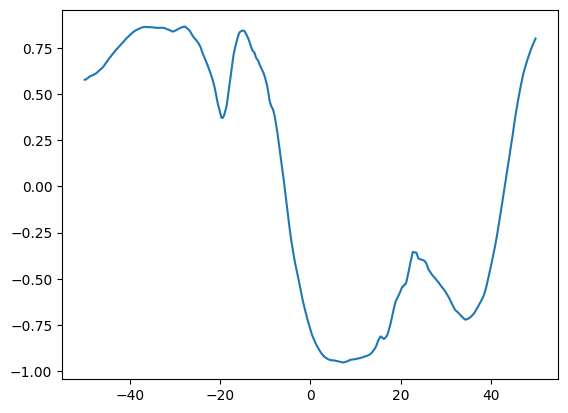

In [13]:
print(x_tensor.shape)
y_hat = model(x_tensor) # forward pass
y_hat = y_hat.detach().cpu().numpy().flatten() # convert from tensor in GPU to numpy array in CPU memory
plt.plot(x, y_hat)

In [14]:
# mean squared error
# our loss or error function
# we learn be minimizing this via backpropagation
np.mean((y_hat - y)**2)

1.2090857

In [15]:
# lets train the model
# define loss function
loss_fn = nn.MSELoss() # mean squared error for regression,
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3) # Stochastic Gradient Descent
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) # A more sophisticated gradient descent

In [16]:
# training loop
def train(model, loss_fn, optimizer):
    model.train() # we say that we are in training mode

    # Compute prediction error
    y_hat = model(x_tensor) # forward pass -- when prediction happens X -> Y_hat
    loss = loss_fn(y_hat, y_tensor) # calculate the loss / error ERROR(Y_hat, Y)

    # Backpropagation
    loss.backward() # backward pass, calculate the "error contribution" of each weight
    optimizer.step() # update the weight to reduce the error contribution
    optimizer.zero_grad() # reset the "gradients" -- "error contribution"

    return loss

In [17]:
a = "hello"
b = 123
print("{a} and {b}") # returns the string as is
print(f"{a} and {b}") # adding f formats it to take variables
print("{0} and {1}".format(a, b)) # you indicate the index in brackets then define them in format()

{a} and {b}
hello and 123
hello and 123


In [18]:
# lets train
epochs = 50000 # how many passes in the entire dataset
for t in range(epochs):
    loss = train(model, loss_fn, optimizer)
    if t % 5000 == 0: # modulo operator returns remainder. If it has no remainder then True, else False
        print(f"Epoch {t} : {loss}")
print("Done!")

Epoch 0 : 1.2090857028961182
Epoch 5000 : 0.5086247324943542
Epoch 10000 : 0.4800809621810913
Epoch 15000 : 0.4413606822490692
Epoch 20000 : 0.4607313275337219
Epoch 25000 : 0.4600318372249603
Epoch 30000 : 0.41409680247306824
Epoch 35000 : 0.4381972551345825
Epoch 40000 : 0.39655983448028564
Epoch 45000 : 0.3583226203918457
Done!


(1000, 1)
(1000,)


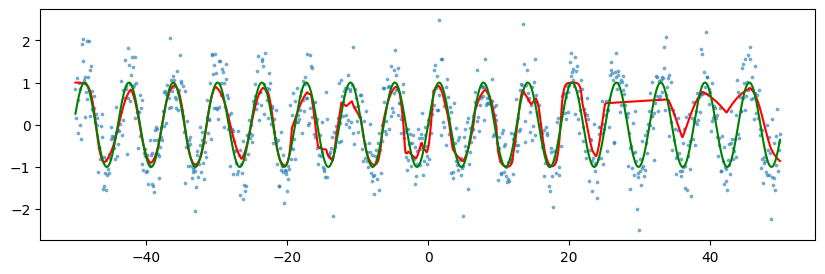

In [19]:
model.eval() # make sure in evaluation mode!!
y_hat = model(x_tensor) # forward pass to make predictions
# note that y_hat is a Pytorch tensor and we need to convert to Numpy Arrays for visualization
# Numpy arrays are compatible with other Python libraries like Matplotlib for visualization
# Pytorch builds a "computation graph" (directed acyclic graph) which relates tensors with each other and operations between them
# If you want to extract a particular tensor, e.g. y_hat, you need to detach() first so that it doesnt affect the rest
# then we move the tensor from GPU memory to CPU memory to plot
# then we need to convert to Numpy
# flatten() simply removes extra dimensions that we added earlier using unsqueeze()
y_hat = y_hat.detach().cpu().numpy()
print(y_hat.shape)
y_hat = y_hat.flatten() # convert from tensor in GPU to numpy array in CPU memory
print(y_hat.shape)

plt.figure(figsize=(10, 3))
plt.plot(x, y_hat, c='r')
plt.scatter(x, y, s=3, alpha=0.5)
plt.plot(x, f, 'green')

In [20]:
# what if we remove the activation functions - ReLU? but retain tanh
# what if we remove tanh or replace it with relu